In [1]:
import matplotlib.pyplot as plt 
from data_access.model_folder import ModelFolder
from pathlib import Path
from common import DAL
from collections import defaultdict

# fig=plt.figure(figsize=(54,54), dpi= 80, facecolor='w', edgecolor='k')

Using TensorFlow backend.


In [2]:
base = Path('C:\\Users\\Public\\Documents\\Data\\2019\\models')

In [3]:
MIN_DAL = 150
predicate = lambda d: d.id >= MIN_DAL and d.class_strategy == 'answers'
# predicate = lambda d: (154 <= d.id <= 160) or d.id >= 178
model_dals = DAL.get_models()
model_dals = [d for d in model_dals if predicate(d)]
dirs = ((Path(model_dal.model_location).parent, model_dal) for model_dal in model_dals)
model_folders = [(ModelFolder(d), model_dal) for (d, model_dal) in dirs]
{dal.id: mf for mf, dal in model_folders}

{150: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190421_2056_15_dense_layers8_9_6_trained"),
 151: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0117_15_dense_layers8_9_7_trained"),
 152: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0538_01_dense_layers9_6_7_trained"),
 153: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_0958_55_dense_layers9_6_8_trained"),
 154: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_1546_38_Abnormality_yes_no_trained"),
 155: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_1759_42_Plane_trained"),
 156: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_2011_40_Organ_trained"),
 157: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190422_2225_56_Modality_trained"),
 158: ModelFolder(folder="C:\\Users\\Public\\Documents\\

In [4]:
question_categories = DAL.get_question_categories()
def get_question_category(model_id):
    #model_id = model_dal.model_id#178
    dal = model_folders[0][-1]
    scores = DAL.get_partial_scores()

    cat_id = sorted([s for s in scores if s.model_id == model_id], key=lambda sc: (sc.score, sc.model_id), reverse=True)[0].question_category_id
    return next(cat.Category for cat in question_categories if cat.id == cat_id)
    
get_question_category(178)

'Abnormality_yes_no'

In [5]:
%%capture
# %matplotlib inline
maxes = defaultdict(list)
for mf, model_dal in model_folders:    
    max_vals, epoch_i = mf.plot(metric='acc')        
    category = get_question_category(model_dal.id)
    maxes[category].append((max_vals, epoch_i, mf, model_dal.id, model_dal))

IndexError: list index out of range

In [6]:
for category, tpls_arr in maxes.items():
    ordered = sorted(tpls_arr, key=lambda tpl: tpl[0][tpl[1]], reverse=True)
    maxes[category] = ordered    


In [7]:
def plot_tpl(tpl):
    max_vals, epoch_i, mf, model_id, model_dal = tpl
    print(f'----------{mf.question_category}:  {model_id}: {mf}----------')
    max_vals, epoch_i = mf.plot(metric='acc')
    max_vals, epoch_i = mf.plot()
    print(max_vals)
    print (model_dal.notes)

----------Abnormality:  172: ModelFolder(folder="C:\\Users\\Public\\Documents\\Data\\2019\\models\\20190425_1112_42_Abnormality_dense_8_7_6_lstm_128_trained")----------


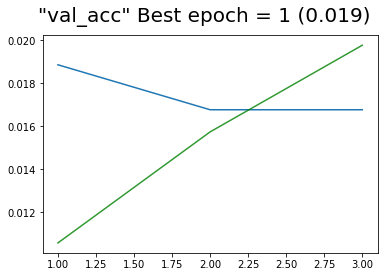

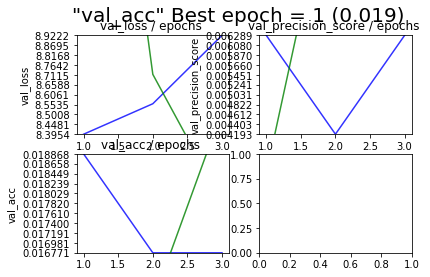

[0.018867924528301886, 0.016771488469601678, 0.016771488469601678]
post_concat_dense_units: (8, 7, 6);
Optimizer: RMSprop
loss: categorical_crossentropy
activation: softmax
prediction vector: answers
lstm_units: 128
batch_size: 32
epochs: 3
For Category: Abnormality

model_location = 'C:\Users\Public\Documents\Data\2019\models\20190425_1112_42_Abnormality_dense_8_7_6_lstm_128_trained\vqa_model.h5'


In [18]:
# k = 'Abnormality_yes_no'
# k = 'Plane'
# k = 'Organ'
# k = 'Modality'
k = 'Abnormality'
idx = 8
lst = maxes[k]
tpl = lst[idx]
plot_tpl(tpl)

In [ ]:
# %matplotlib inline
for category, tpls_array in maxes.items():
    tpl = tpls_array[0]   
    plot_tpl(tpl)
    print('==============================================================================')    

In [ ]:
maxes